# Creative Level Models - KPI Lift: Random Forest

This notebook is to build a creative level predictive model for awareness, consideration and intent rates, using the creative elements as predictors.

In [2]:
import numpy as np, pandas as pd, os, matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)
%matplotlib inline

In [3]:
df_raw = pd.read_csv(r"G:\My Drive\Creative_Meta_Analysis\Wave_2\SUMMARY_5_25.csv")

In [4]:
df_raw['aware_lift'] = df_raw['aware'] - df_raw['aware_base']
df_raw['cons_lift'] = df_raw['cons'] - df_raw['cons_base']
df_raw['purch_lift'] = df_raw['purch'] - df_raw['purch_base']

## Data Prep

In [3]:
df_raw.head()

,SID,Creative_Name,aware,cons,purch,enjoy,brand,rel,b_appeal,aware_base,cons_base,purch_base,gender,north_america,emea,apac,mobile,desktop,s06,s15,s30,age_30,age_45,p_low,p_high,pro_nexus,pro_android_os,pro_chromebook,pro_chromecast_aud,pro_chromecast,pro_google_play,pro_youtube_red,pro_youtube_music,pro_google_user,pro_google_photos,pro_g_suite,pro_pixel,pro_daydream,pro_android_pay,pro_google_home,pro_gsa,pro_google_assist,pro_youtube_tv,pro_android_wear,pro_fi,pro_youtube,pro_google_cloud,pro_google_express,pro_digital_skills,pro_feed,pro_google_home_mini,pro_duo,pro_ellen,pro_pixelbook,pro_google_duo,pro_pixel_2,pro_watercooler,pro_google_home_max,Real_World,Story_Driven,Event,Google_Logo_Upfront_Recode,Product_Logo_Upfront_Recode,Audio_Mention_Upfront_Recode,No_of_Visuals_Recode,Google_Logo_50,Product_Logo_50,Product_Shot_50,Text_on_End_Card,Demo,Front_Card,End_Card,Pop_Culture,Visually_Text_Only,Music,Voiceover,No_Product_Msgs_Recode
0,266344,Nexus5AvailableNow15sec=266344B (Test),0.478548,0.283828,0.369637,0.495050,0.693069,0.749175,0.577558,0.310000,0.18,0.36,0.287129,1,0,0,0,1,0,1,0,0.679868,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,Zero,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Zero
1,266344,Nexus5XAvailableNow30sec=266344A (Test),0.544262,0.295082,0.432787,0.619672,0.780328,0.868852,0.704918,0.310000,0.18,0.36,0.268852,1,0,0,0,1,0,0,1,0.678689,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,One+,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Two+
2,266344,Nexus6PAvailableNow30Sec=266344C (Test),0.590164,0.347541,0.445902,0.577049,0.793443,0.862295,0.714754,0.310000,0.18,0.36,0.340984,1,0,0,0,1,0,0,1,0.681967,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,Zero,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Two+
3,268118,Android Disco 30sec,0.923333,NaN,NaN,0.676667,0.756667,0.870000,0.676667,0.906667,NaN,NaN,0.326667,1,0,0,0,1,0,0,1,0.663333,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,real world,no,no,1+,Zero,Zero,Zero,no,no,yes,yes,yes,yes,yes,no,No,yes,no,Two+
4,268118,Android Fog 30sec,0.920530,NaN,NaN,0.658940,0.751656,0.850993,0.639073,0.906667,NaN,NaN,0.284768,1,0,0,0,1,0,0,1,0.652318,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,real world,yes,no,1+,1+,Zero,Zero,no,no,yes,yes,yes,yes,yes,no,No,yes,yes,One


In [4]:
df_raw.shape

(434, 77)

In [5]:
df_raw.columns

Index(['SID', 'Creative_Name', 'aware', 'cons', 'purch', 'enjoy', 'brand',
       'rel', 'b_appeal', 'aware_base', 'cons_base', 'purch_base', 'gender',
       'north_america', 'emea', 'apac', 'mobile', 'desktop', 's06', 's15',
       's30', 'age_30', 'age_45', 'p_low', 'p_high', 'pro_nexus',
       'pro_android_os', 'pro_chromebook', 'pro_chromecast_aud',
       'pro_chromecast', 'pro_google_play', 'pro_youtube_red',
       'pro_youtube_music', 'pro_google_user', 'pro_google_photos',
       'pro_g_suite', 'pro_pixel', 'pro_daydream', 'pro_android_pay',
       'pro_google_home', 'pro_gsa', 'pro_google_assist', 'pro_youtube_tv',
       'pro_android_wear', 'pro_fi', 'pro_youtube', 'pro_google_cloud',
       'pro_google_express', 'pro_digital_skills', 'pro_feed',
       'pro_google_home_mini', 'pro_duo', 'pro_ellen', 'pro_pixelbook',
       'pro_google_duo', 'pro_pixel_2', 'pro_watercooler',
       'pro_google_home_max', 'Real_World', 'Story_Driven', 'Event',
       'Google_Logo_Upfront_Re

In [5]:
df = df_raw[[
    'aware_lift', 
    'cons_lift', 
    'purch_lift', 
    
    'north_america', 
    'emea', 
    'apac', 
    'mobile', 
    'desktop', 
    's06',
    's15', 
    's30',
    'pro_nexus', 
    'pro_android_os',   
    'pro_chromebook', 
    'pro_chromecast_aud', 
    'pro_chromecast',
    'pro_google_play', 
    'pro_youtube_red', 
    'pro_youtube_music',
    'pro_google_user', 
    'pro_google_photos', 
    'pro_g_suite', 
    'pro_pixel',
    'pro_daydream', 
    'pro_android_pay', 
    'pro_google_home', 
    'pro_gsa',
    'pro_google_assist', 
    'pro_youtube_tv', 
    'pro_android_wear', 
    'pro_fi',
    'pro_youtube', 
    'pro_google_cloud', 
    'pro_google_express',
    'pro_digital_skills', 
    'pro_feed',
    'pro_google_home_mini', 
    'pro_duo',
    'pro_ellen', 
    'pro_pixelbook', 
    'pro_google_duo', 
    'pro_pixel_2',
    'pro_watercooler', 
    'pro_google_home_max', 
    
    'Real_World', 
    'Story_Driven',
    'Event', 
    'Google_Logo_Upfront_Recode', 
    'Product_Logo_Upfront_Recode',
    'Audio_Mention_Upfront_Recode', 
    'No_of_Visuals_Recode',
    'Google_Logo_50', 
    'Product_Logo_50', 
    'Product_Shot_50',
    'Text_on_End_Card', 
    'Demo', 
    'Front_Card', 
    'Pop_Culture',
    'Music', 
    'Voiceover', 
    'No_Product_Msgs_Recode'
]]

In [6]:
df = pd.get_dummies(df, columns = [
    'Real_World', 
    'Story_Driven',
    'Event', 
    'Google_Logo_Upfront_Recode', 
    'Product_Logo_Upfront_Recode',
    'Audio_Mention_Upfront_Recode', 
    'No_of_Visuals_Recode',
    'Google_Logo_50', 
    'Product_Logo_50', 
    'Product_Shot_50',
    'Text_on_End_Card', 
    'Demo', 
    'Front_Card', 
    'Pop_Culture',
    'Music', 
    'Voiceover', 
    'No_Product_Msgs_Recode'
])

## Model KPI Lifts

### Awareness

In [7]:
df_aware = df.drop(axis=1, columns=['cons_lift', 'purch_lift']).dropna()
X = df_aware.drop(axis=1, columns=['aware_lift'])
y_aware = df_aware['aware_lift']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_aware, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = [{
    'n_estimators': [22, 23, 24],
    'max_depth': [20, 25, 30],
    'max_features': ['auto'] 
}]

rf_aware = RandomForestRegressor(random_state=42)
rf_grid_aware = GridSearchCV(rf_aware, params)
rf_grid_aware.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [22, 23, 24], 'max_depth': [20, 25, 30], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [10]:
pd.DataFrame(rf_grid_aware.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.046810,0.000000,0.580897,0.907115,20,auto,22,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",7,0.639725,0.907522,0.518247,0.895627,0.584746,0.918197,0.000083,0.000000,0.049724,0.009218
1,0.041657,0.005218,0.578790,0.907366,20,auto,23,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",8,0.636102,0.906910,0.524025,0.895990,0.576227,0.919199,0.007365,0.007379,0.045844,0.009481
2,0.043589,0.000000,0.578469,0.907787,20,auto,24,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",9,0.637974,0.907277,0.526406,0.896104,0.570976,0.919979,0.004659,0.000000,0.045905,0.009754
3,0.046862,0.000000,0.589389,0.907943,25,auto,22,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",2,0.651345,0.908526,0.524637,0.896277,0.592205,0.919025,0.000005,0.000000,0.051826,0.009296
4,0.046852,0.000000,0.587997,0.908082,25,auto,23,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",4,0.652828,0.908240,0.527208,0.896398,0.583927,0.919609,0.000014,0.000000,0.051423,0.009476
5,0.065235,0.000000,0.585810,0.908529,25,auto,24,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",5,0.654407,0.908222,0.523530,0.896626,0.579448,0.920740,0.003889,0.000000,0.053680,0.009847
6,0.061075,0.000998,0.590687,0.908158,30,auto,22,"{'max_depth': 30, 'max_features': 'auto', 'n_e...",1,0.655230,0.909171,0.524637,0.896277,0.592205,0.919025,0.020098,0.001411,0.053387,0.009314
7,0.047427,0.001351,0.589212,0.908296,30,auto,23,"{'max_depth': 30, 'max_features': 'auto', 'n_e...",3,0.656463,0.908880,0.527208,0.896398,0.583927,0.919609,0.007768,0.000955,0.052960,0.009485
8,0.047305,0.000665,0.585735,0.908593,30,auto,24,"{'max_depth': 30, 'max_features': 'auto', 'n_e...",6,0.653655,0.908547,0.523530,0.896626,0.579981,0.920606,0.000624,0.000941,0.053339,0.009790


In [11]:
rf_aware = rf_grid_aware.best_estimator_

In [12]:
from sklearn.metrics import mean_squared_error

rmse_aware = mean_squared_error(y_test, rf_aware.predict(X_test))**0.5
rmse_aware

0.0600124274385805

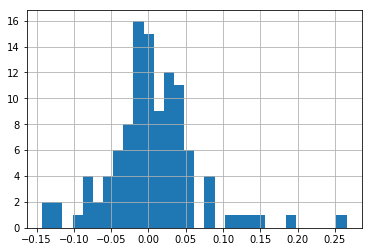

In [13]:
residuals = y_test-rf_aware.predict(X_test)
pd.Series(residuals).hist(bins=30)

### Consideration

In [14]:
df_cons = df.drop(axis=1, columns=['aware_lift', 'purch_lift']).dropna()
X = df_cons.drop(axis=1, columns=['cons_lift'])
y_cons = df_cons['cons_lift']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cons, test_size=0.2, random_state=42)

In [16]:
params = [{
    'n_estimators': [40, 45, 50],
    'max_depth': [15, 25, 35],
    'max_features': ['auto'] 
}]

rf_cons = RandomForestRegressor(random_state=42)
rf_grid_cons = GridSearchCV(rf_cons, params)
rf_grid_cons.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [40, 45, 50], 'max_depth': [15, 25, 35], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [17]:
pd.DataFrame(rf_grid_cons.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.059213,0.006195,0.460672,0.871182,15,auto,40,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",4,0.536290,0.877269,0.459426,0.864318,0.385592,0.871959,0.017441,0.006755,0.061479,0.005316
1,0.067692,0.000000,0.459359,0.871327,15,auto,45,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",5,0.536259,0.876737,0.457616,0.865941,0.383485,0.871304,0.007365,0.000000,0.062332,0.004407
2,0.067536,0.000998,0.465334,0.872846,15,auto,50,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",1,0.538052,0.878486,0.465860,0.868007,0.391392,0.872046,0.007123,0.001411,0.059827,0.004315
3,0.059239,0.000000,0.456890,0.871674,25,auto,40,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",8,0.529269,0.877624,0.461382,0.865322,0.379288,0.872075,0.004087,0.000000,0.061263,0.005030
4,0.068363,0.001662,0.457351,0.871802,25,auto,45,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",6,0.531870,0.877589,0.459903,0.866199,0.379547,0.871619,0.004143,0.001244,0.062162,0.004652
5,0.077783,0.000000,0.463585,0.873183,25,auto,50,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",2,0.533636,0.878959,0.466769,0.868211,0.389651,0.872379,0.000461,0.000000,0.058778,0.004425
6,0.062485,0.000000,0.456890,0.871674,35,auto,40,"{'max_depth': 35, 'max_features': 'auto', 'n_e...",8,0.529269,0.877624,0.461382,0.865322,0.379288,0.872075,0.000001,0.000000,0.061263,0.005030
7,0.066169,0.000665,0.457351,0.871802,35,auto,45,"{'max_depth': 35, 'max_features': 'auto', 'n_e...",6,0.531870,0.877589,0.459903,0.866199,0.379547,0.871619,0.012333,0.000940,0.062162,0.004652
8,0.081248,0.000032,0.463585,0.873183,35,auto,50,"{'max_depth': 35, 'max_features': 'auto', 'n_e...",2,0.533636,0.878959,0.466769,0.868211,0.389651,0.872379,0.003497,0.000045,0.058778,0.004425


In [18]:
rf_cons = rf_grid_cons.best_estimator_

In [19]:
rmse_cons = mean_squared_error(y_test, rf_cons.predict(X_test))**0.5
rmse_cons

0.04375712297839301

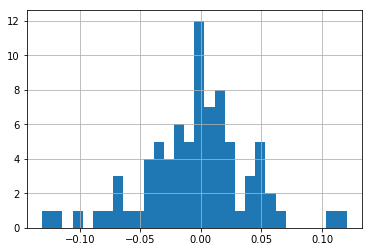

In [20]:
residuals = y_test-rf_cons.predict(X_test)
pd.Series(residuals).hist(bins=30)

### Purchase

In [21]:
df_purch = df.drop(axis=1, columns=['aware_lift', 'cons_lift']).dropna()
X = df_purch.drop(axis=1, columns=['purch_lift'])
y_purch = df_purch['purch_lift']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_purch, test_size=0.2, random_state=42)

In [23]:
params = [{
    'n_estimators': [225, 250, 275],
    'max_depth': [20, 25],
    'max_features': ['auto'] 
}]

rf_purch = RandomForestRegressor(random_state=42)
rf_grid_purch = GridSearchCV(rf_purch, params)
rf_grid_purch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [225, 250, 275], 'max_depth': [20, 25], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [24]:
pd.DataFrame(rf_grid_purch.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.399970,0.005207,0.180748,0.785023,20,auto,225,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",2,0.232416,0.784875,0.139467,0.810459,0.170278,0.759735,0.016921,0.007364,0.038705,0.020709
1,0.425891,0.015621,0.181378,0.785298,20,auto,250,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",1,0.230750,0.784346,0.140003,0.811215,0.173316,0.760333,0.026074,0.000003,0.037528,0.020783
2,0.486606,0.015634,0.179316,0.785390,20,auto,275,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",3,0.232667,0.783815,0.134108,0.812119,0.171108,0.760237,0.033175,0.000019,0.040702,0.021210
3,0.383791,0.007280,0.177339,0.785256,25,auto,225,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",5,0.230318,0.784878,0.133879,0.810794,0.167746,0.760096,0.016705,0.006422,0.039998,0.020699
4,0.434300,0.010416,0.178611,0.785612,25,auto,250,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",4,0.228746,0.784439,0.134850,0.811635,0.172186,0.760761,0.036844,0.007365,0.038649,0.020786
5,0.471280,0.015621,0.176821,0.785684,25,auto,275,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",6,0.230979,0.783930,0.129269,0.812524,0.170164,0.760596,0.033303,0.000002,0.041841,0.021236


In [25]:
rf_purch = rf_grid_purch.best_estimator_

In [26]:
rmse_purch = mean_squared_error(y_test, rf_purch.predict(X_test))**0.5
rmse_purch

0.0384882055811392

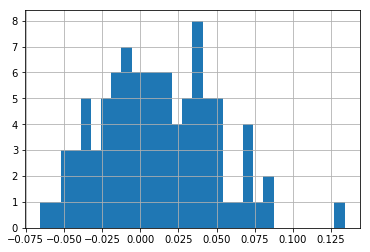

In [27]:
residuals = y_test-rf_purch.predict(X_test)
pd.Series(residuals).hist(bins=30)

### Save Models

In [28]:
from sklearn.externals import joblib

joblib.dump(rf_aware, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_aware_creative_lift.pkl') 
joblib.dump(rf_cons, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_cons_creative_lift.pkl') 
joblib.dump(rf_purch, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_purch_creative_lift.pkl') 

['C:\\Users\\william.raikes\\Programming\\Python\\Creative_Elements_App\\model_building\\pickled_models\\rf_purch_creative_lift.pkl']

### Test Prediction 

See how well it does with real scenarios, not just metric scores.

In [27]:
rf_aware.predict(df.iloc[100, 3:]), rf_cons.predict(df.iloc[100, 3:]), rf_purch.predict(df.iloc[100, 3:])

c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.resh

(array([0.70469562]), array([0.2635927]), array([0.28786065]))